Laboratorium 2

Wprowadzenie do analizy sygnału

Martyna Toborek 311843

In [1]:
import numpy as np
import scipy.signal as sig
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa.util


# Osie!!!!

# Zad 1

W tym zadaniu należy porównać różne sygnały w funkcji czasu oraz ich widma. 

In [2]:
# częstotliwość próbkowania
fs = 48000

a) sygnał nieskończony (sinus)

<function matplotlib.pyplot.show(close=None, block=None)>

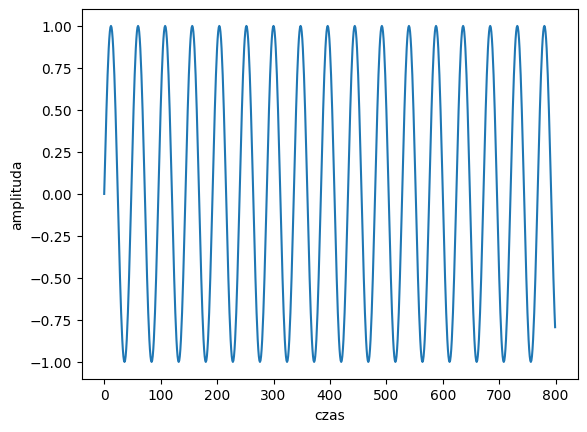

In [3]:
n = np.arange(2048)
sinus = np.sin(2*np.pi*n*1000/fs)

fig, ax = plt.subplots()
ax.plot(n[0:800],sinus[0:800])
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

widmo sygnału nieskończonego

<function matplotlib.pyplot.show(close=None, block=None)>

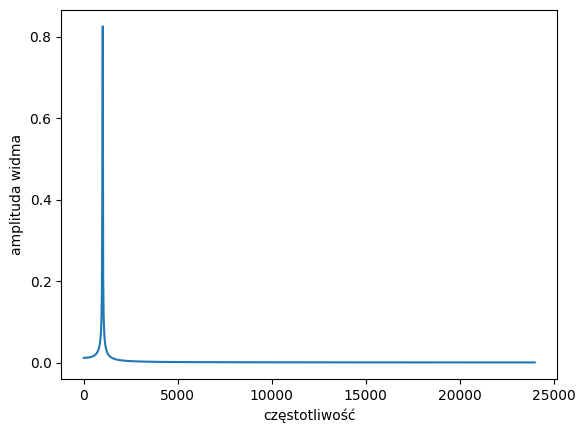

In [4]:
f = np.fft.rfftfreq(2048, 1/fs)
widmo_amp = np.abs(np.fft.rfft(sinus))/ 1024

fig, ax = plt.subplots()
ax.set_ylabel('amplituda[db]')
ax.plot(f, widmo_amp)
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

b) sygnał okna prostokątnego

<function matplotlib.pyplot.show(close=None, block=None)>

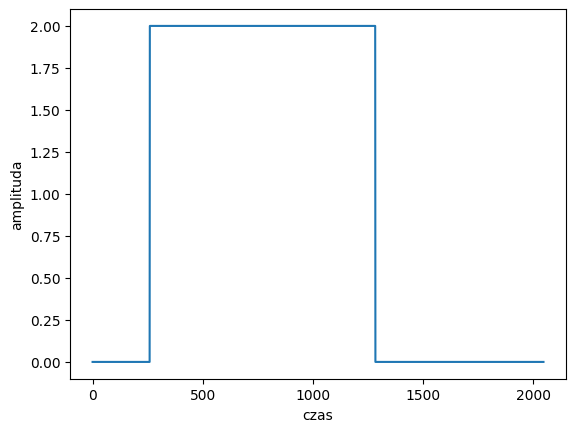

In [5]:
l = np.linspace(0, 1, 2048, endpoint=False)
prostokat = sig.square(l*2*np.pi+150)+1
fig, ax = plt.subplots()
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
ax.plot(prostokat)
plt.show

widmo sygnału okna prostokątnego

<function matplotlib.pyplot.show(close=None, block=None)>

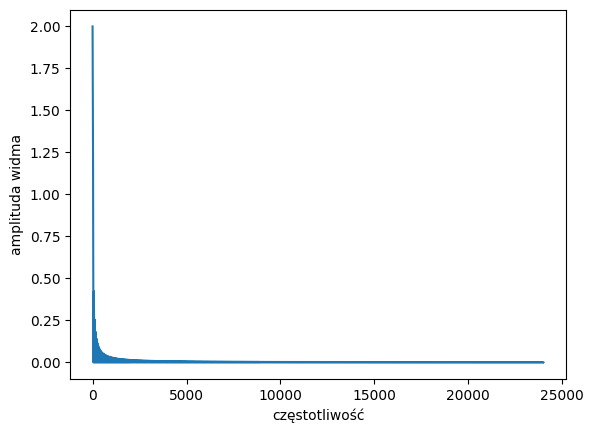

In [6]:
wid_pr =  np.abs(np.fft.rfft(prostokat))/ 1024

fig, ax = plt.subplots()
ax.plot(f, wid_pr)
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show


c) sygnał skończony

<function matplotlib.pyplot.show(close=None, block=None)>

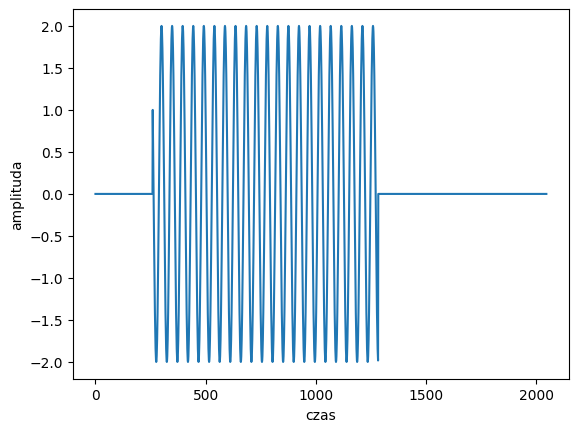

In [7]:
sygn = prostokat*sinus
fig, ax = plt.subplots()
ax.plot(sygn)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

widmo sygnału skończonego

<function matplotlib.pyplot.show(close=None, block=None)>

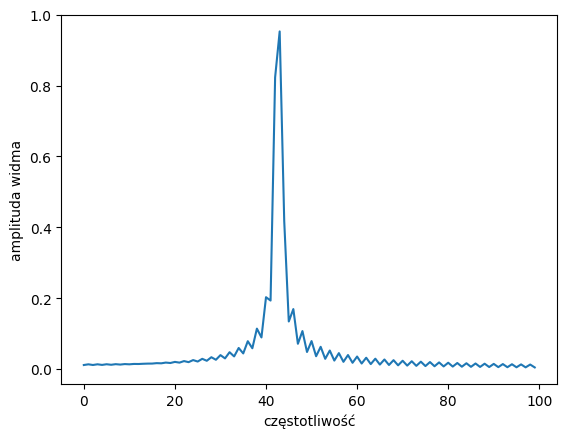

In [8]:
wid_s =  np.abs(np.fft.rfft(sygn))/ 1024

fig, ax = plt.subplots()
ax.plot(wid_s[0:100])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

d) sygnał okna nieprostokatnego

<function matplotlib.pyplot.show(close=None, block=None)>

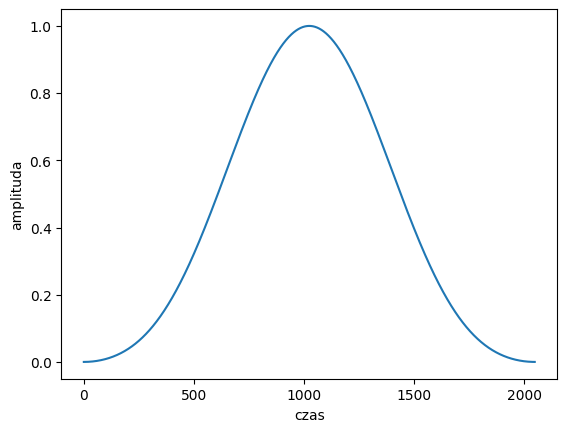

In [9]:
niepr = np.blackman(2048)

fig, ax = plt.subplots()
ax.plot(niepr)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

widmo okna nieprostokatnego

<function matplotlib.pyplot.show(close=None, block=None)>

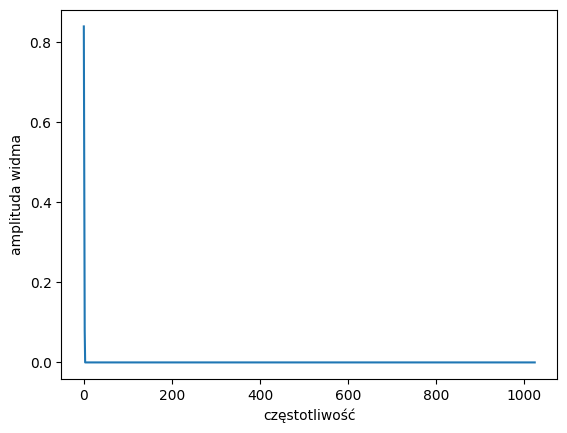

In [10]:
wid_niepr =  np.abs(np.fft.rfft(niepr))/ 1024

fig, ax = plt.subplots()
ax.plot(wid_niepr)
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

e) sygnał skończony wygładzonego okna

<function matplotlib.pyplot.show(close=None, block=None)>

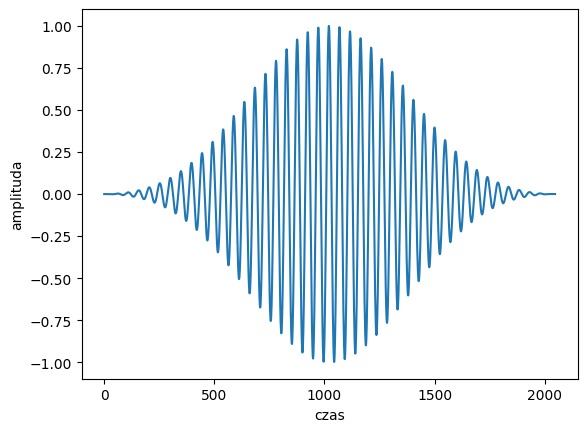

In [11]:
syg_no = np.blackman(2048) * sinus

fig, ax = plt.subplots()
ax.plot(syg_no)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

widmo sygnału skończonego wygładzonego okna

<function matplotlib.pyplot.show(close=None, block=None)>

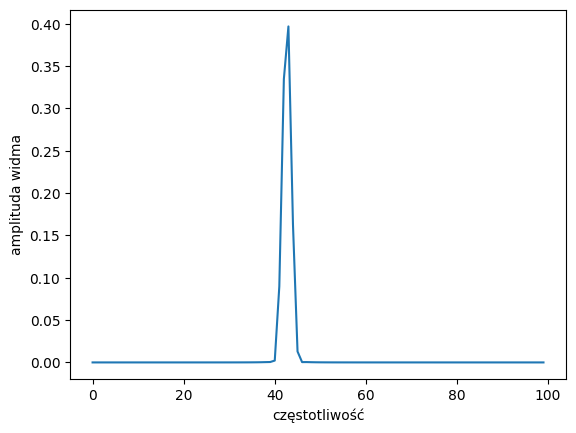

In [12]:
wid_no = np.abs(np.fft.rfft(np.blackman(2048) * sinus))/ 1024

fig, ax = plt.subplots()
ax.plot(wid_no[0:100])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Widma sygnału skończonego wygładzonego przez okno prostokątne i nieprostokątne są podobne, jednak to przy oknie nieprostokątnym jest gładszy. 

# Zad 2

W tym zadaniu będziemy analizować sygnał, nagranie dźwięku w formacie .wav - "chord.wav".


In [13]:
rate, sygnal = wavfile.read('chord.wav')

Należy wyznaczyć częstotliwość Nyquista, czyli częstotliwość najwyższej składowej harmonicznej sygnału próbkowanego. 

In [14]:
fNyq=rate/2
print(fNyq)

22050.0


Wygląd analizowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

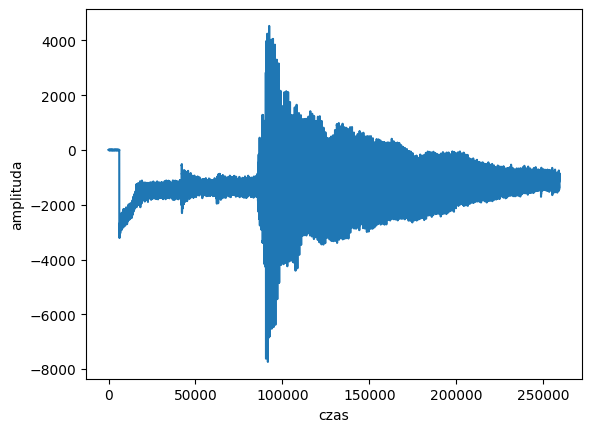

In [15]:
fig, ax = plt.subplots()
ax.plot(sygnal)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

Widmo sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

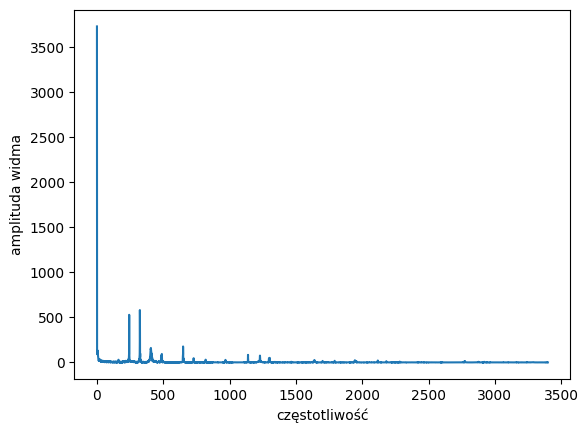

In [16]:
widmo = np.abs(np.fft.rfft(sygnal))/rate/2
f = np.fft.rfftfreq(len(sygnal), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], widmo[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Następnie należy dokonać decymacji sygnału, czyli pozbywania co drugiej próbki sygnału. 

Decymacja sygnału oraz widmo decymowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

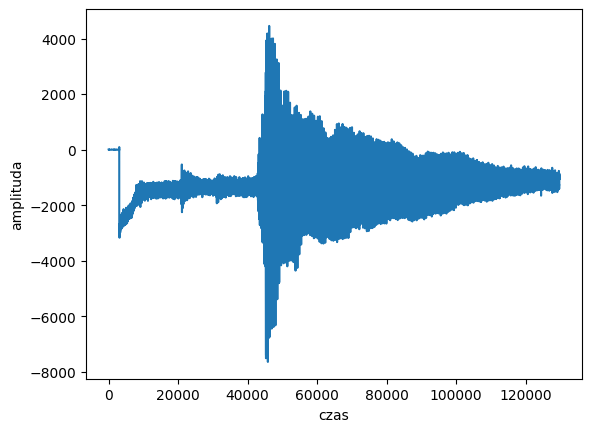

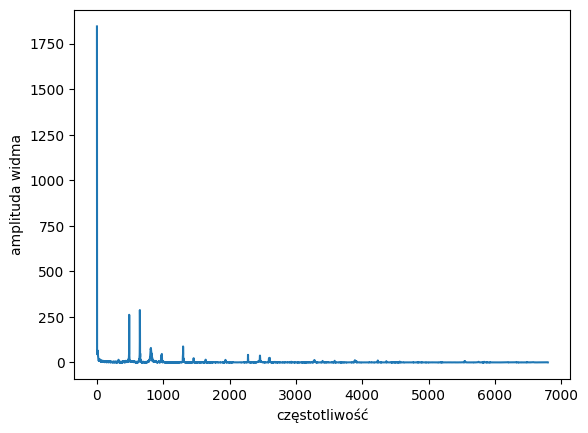

In [17]:
sygnal1 = sig.decimate(sygnal,2)

fig, ax = plt.subplots()
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
ax.plot(sygnal1)
plt.show

wid_dec=np.abs(np.fft.rfft(sygnal1)) /rate/2
f = np.fft.rfftfreq(len(sygnal1), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_dec[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Ponowna decymacja sygnału oraz widmo decymowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

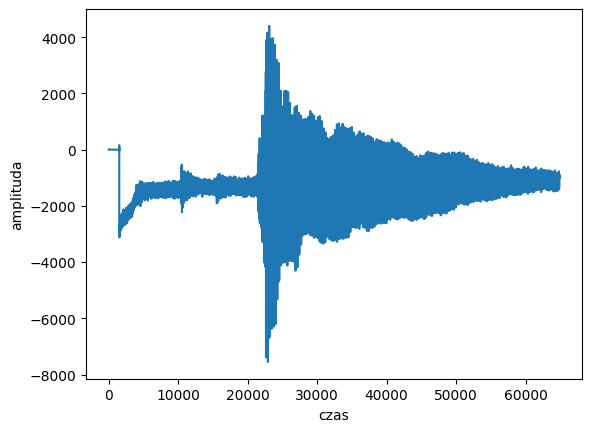

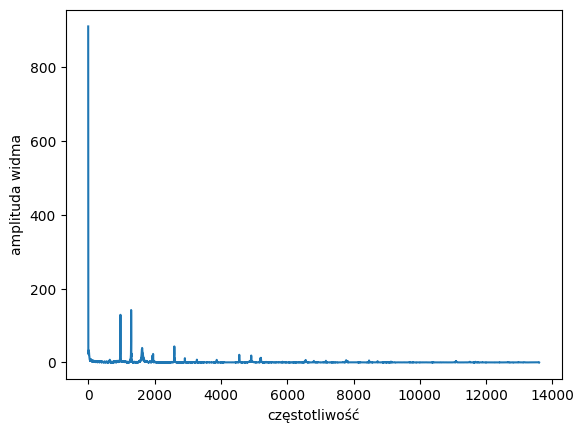

In [18]:
sygnal2 = sig.decimate(sygnal1,2)

fig, ax = plt.subplots()
ax.plot(sygnal2)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

wid_dec2=np.abs(np.fft.rfft(sygnal2)) /rate/2
f = np.fft.rfftfreq(len(sygnal2), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_dec2[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Ponowna decymacja sygnału oraz widmo decymowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

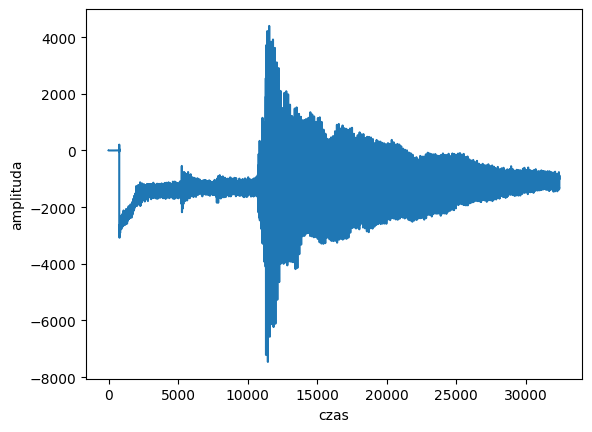

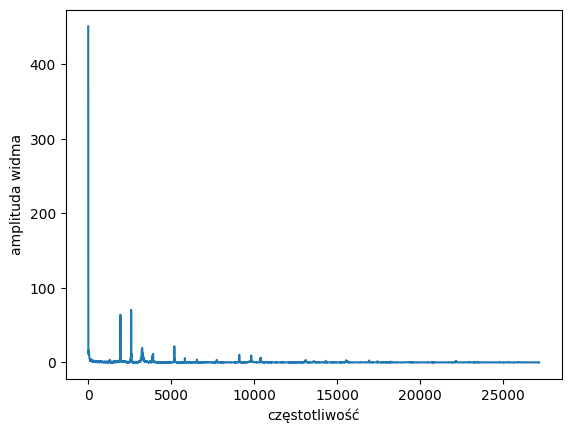

In [19]:
sygnal3 = sig.decimate(sygnal2,2)

fig, ax = plt.subplots()
ax.plot(sygnal3)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

wid_dec3=np.abs(np.fft.rfft(sygnal3)) /rate/2
f = np.fft.rfftfreq(len(sygnal3), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_dec3[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Ponowna decymacja sygnału oraz widmo decymowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

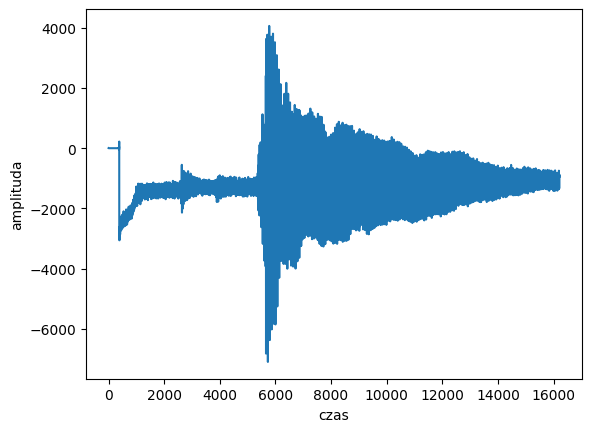

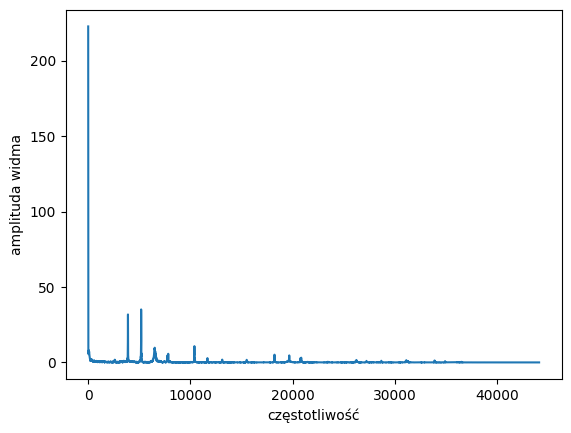

In [20]:
sygnal4 = sig.decimate(sygnal3,2)

fig, ax = plt.subplots()
ax.plot(sygnal4)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

wid_dec4=np.abs(np.fft.rfft(sygnal4)) /rate/2
f = np.fft.rfftfreq(len(sygnal4), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_dec4[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Ponowna decymacja sygnału oraz widmo decymowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

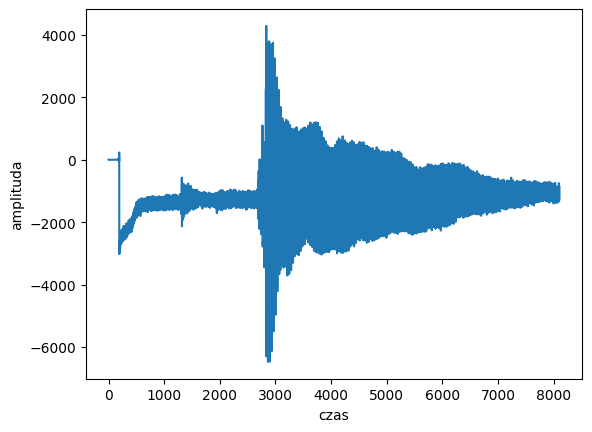

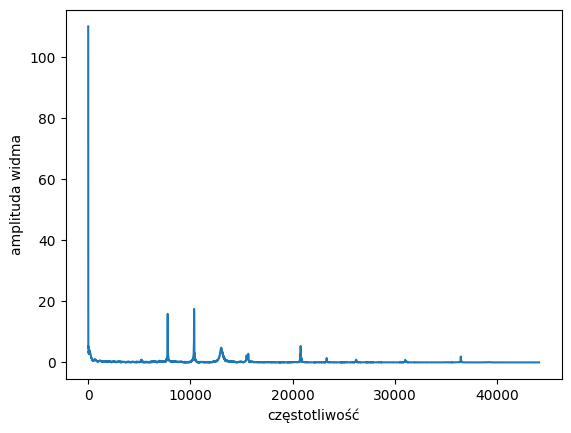

In [21]:
sygnal5 = sig.decimate(sygnal4,2)

fig, ax = plt.subplots()
ax.plot(sygnal5)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

wid_dec5=np.abs(np.fft.rfft(sygnal5)) /rate/2
f = np.fft.rfftfreq(len(sygnal5), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_dec5[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

ponowna decymacja sygnału oraz widmo decymowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

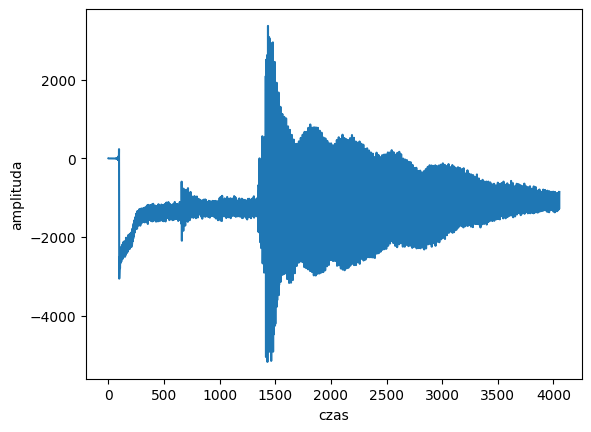

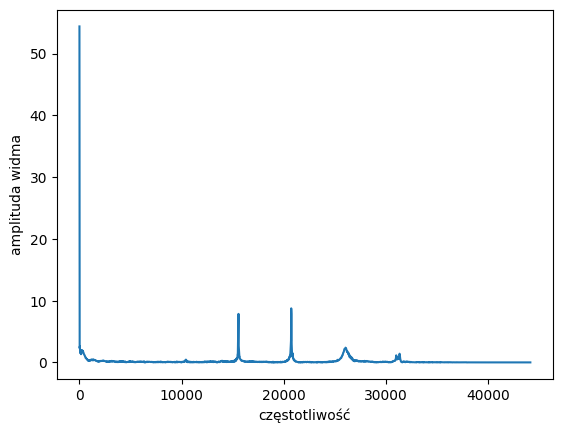

In [22]:
sygnal6 = sig.decimate(sygnal5,2)

fig, ax = plt.subplots()
ax.plot(sygnal6)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

wid_dec6=np.abs(np.fft.rfft(sygnal6)) /rate/2
f = np.fft.rfftfreq(len(sygnal6), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_dec6[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Ponowna decymacja sygnału oraz widmo decymowanego sygnału

<function matplotlib.pyplot.show(close=None, block=None)>

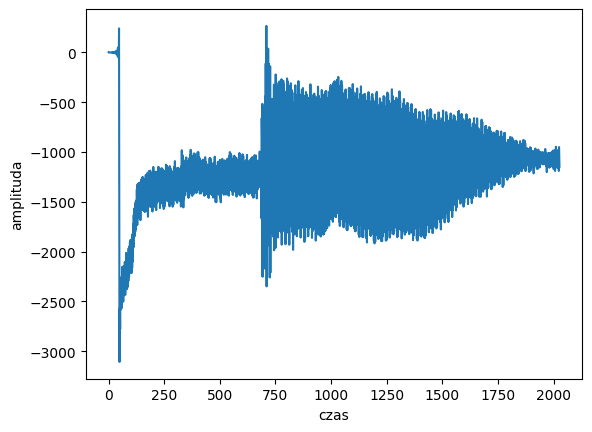

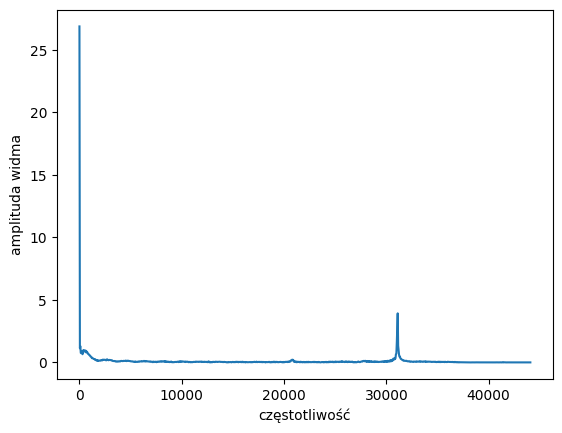

In [23]:
sygnal7 = sig.decimate(sygnal6,2)

fig, ax = plt.subplots()
ax.plot(sygnal7)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show

wid_dec7=np.abs(np.fft.rfft(sygnal7)) /rate/2
f = np.fft.rfftfreq(len(sygnal7), 1/rate/2)

fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_dec7[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Po kilkukrotnej decymacji możemy zauważyć zniekształcenie sygnału, tzw. aliasing. Zostało to spowodowane tym, że wraz ze zmniejszeniem ilości próbek zmniejsza się także częstotliwość próbkowania. 

# Zad 3

W tym zadaniu należy uzupełnić sygnał analizowany w poprzednim zadaniu zerami.
Wykonałam to za pomocą funkcji fix_length z bibliotego librosa.util do analizy plików dźwiękowych.

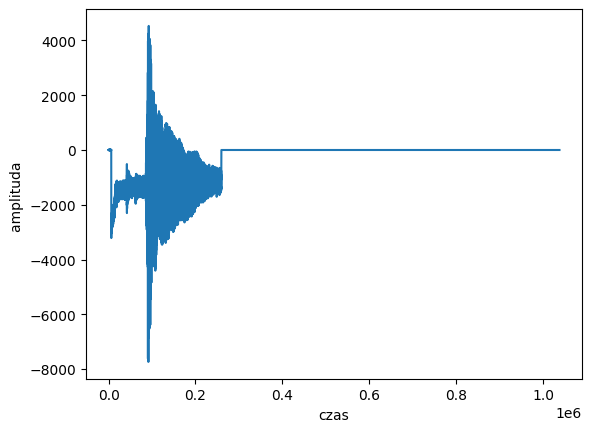

<function matplotlib.pyplot.show(close=None, block=None)>

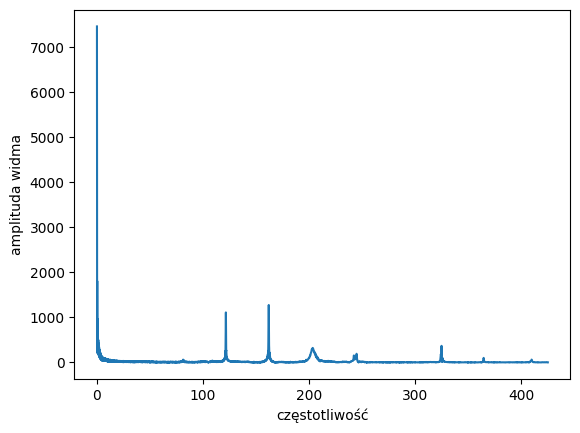

In [24]:
zeropaddingsygnal = librosa.util.fix_length(sygnal, size=4*len(sygnal))
fig, ax = plt.subplots()
ax.plot(zeropaddingsygnal)
ax.set_ylabel('amplituda ')
ax.set_xlabel('czas')
plt.show()

wid_zer=np.abs(np.fft.rfft(zeropaddingsygnal)) /rate
f = np.fft.rfftfreq(len(zeropaddingsygnal), 1/rate)
fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_zer[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Porównując wykresy wydmia dla sygnału oryginalnego oraz po wykonaniu zero paddingu zauważamy, że zakres na osi x zmnieszył się ponad 10-krotnie. 

# Zad 4

W tym zadaniu należy wypełnić sygnał analizowany w zadaniu poprzednim zerami pomiędzy próbkami. 

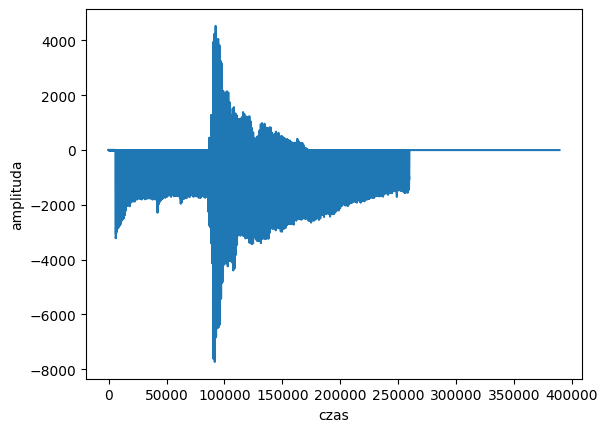

<function matplotlib.pyplot.show(close=None, block=None)>

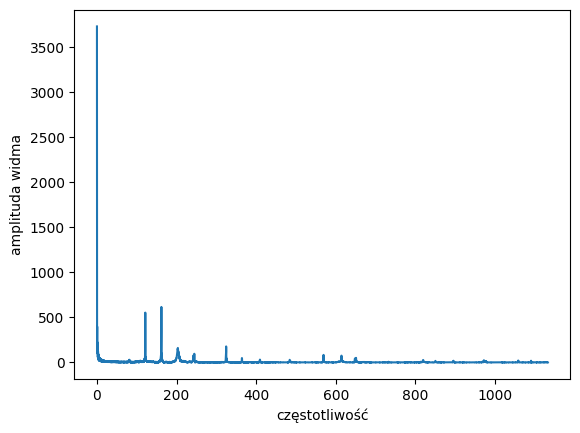

In [25]:
upsamplingsignal= np.zeros(len(sygnal))
for i in range(0,2*len(sygnal), 2):
    if len(sygnal)>i+4:
        upsamplingsignal= np.insert(upsamplingsignal, i, sygnal[i])
   
fig, ax = plt.subplots()
ax.plot(upsamplingsignal)
ax.set_ylabel('amplituda')
ax.set_xlabel('czas')
plt.show()    

wid_upsam=np.abs(np.fft.rfft(upsamplingsignal)) /rate
f = np.fft.rfftfreq(len(upsamplingsignal), 1/rate)
fig, ax = plt.subplots()
ax.plot(f[0:10000], wid_upsam[0:10000])
ax.set_ylabel('amplituda widma')
ax.set_xlabel('częstotliwość')
plt.show

Porównując wykresy wydmia dla sygnału oryginalnego oraz po wykonaniu upsamplingu zauważamy, że zakres na osi x zmnieszył się ok. 3-krotnie. 